# Import libraries

In [1]:
%matplotlib inline
import import_ipynb
import NeuralNet_FromScratch as nnfs_module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from nnfs.datasets import spiral_data
from nnfs.datasets import sine_data
from zipfile import ZipFile
import nnfs
import os
import urllib
import urllib.request
import cv2
import pickle

style.use("dark_background")

# Retreive Dataset

In [2]:
URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
FILE = 'fashion_mnist_images.zip'
FOLDER = 'fashion_mnist_images'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

if not os.path.isdir(FOLDER):
    print("Unzipping images ...")
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('DONE')
    
print("Date preparation is complete.")

Date preparation is complete.


# Fashion MNIST Classifications
0: T-shirt / top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
fashion_mnist_labels = {
    0:'T-shirt / top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

# Data Loading Function

In [4]:
def load_mnist_dataset(dataset, path):
    
    #scan all directories and create list of labels
    labels = os.listdir(os.path.join(path, dataset))
    
    #create lists for samples and labels
    X = []
    y = []
    
    #for each label folder
    for label in labels:
        #for each image in the given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            #read the image
            image = cv2.imread(os.path.join(\
                                path, dataset, label, file),\
                               cv2.IMREAD_UNCHANGED)
            
            #append image to x and label to y
            X.append(image)
            y.append(label)
            
    #convert data structure to numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

# Create MNIST Train & Test Datasets

In [5]:
def create_data_mnist(path):
    
    #load both sets
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    
    #return all datasets
    return X, y, X_test, y_test

# Generate Train and Test Sets

In [6]:
X, y, X_test, y_test = create_data_mnist(FOLDER)
print(len(X))
print(len(y))
print(len(X_test))
print(len(y_test))

60000
60000
10000
10000


# Data Preprocessing

## Scale features
range from -1 to 1

In [7]:
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5

print(X.min(), X.max())
print(X.shape)

-1.0 1.0
(60000, 28, 28)


## Reshape Data
From 3D to 2D by flattening image data from 28x28 to 1x784

In [8]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Shuffle Samples

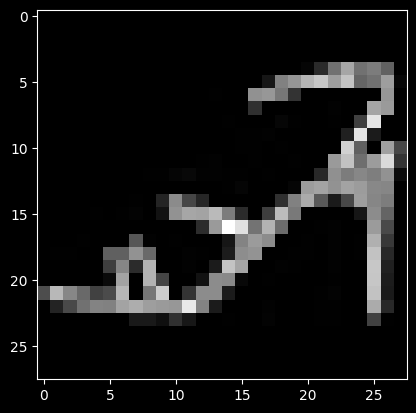

5


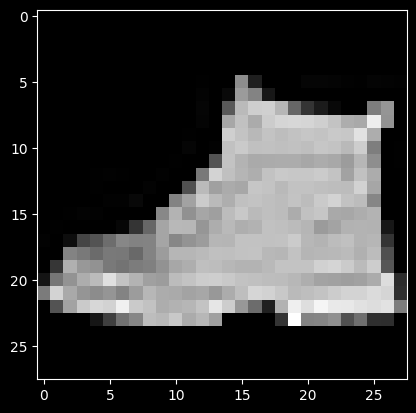

9


In [9]:
keys = np.array(range(X.shape[0])) #number of indices in samples
np.random.shuffle(keys) #shuffle indices

#grab by indice and assign to array
X = X[keys]
y = y[keys]

#test shuffling
plt.imshow(X[8].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[8])

plt.imshow(X[999].reshape(28,28), cmap='gray') #reshape back to a matrix for veiwing
plt.show()
print(y[999])

# Train Model

In [10]:
#instantiate the model
model = nnfs_module.Model()

#add layers
model.add(nnfs_module.Layer_Dense(X.shape[1], 128)) #dense layer 1 with 128 neurons
model.add(nnfs_module.ReLU_Activation()) #ReLU used for activation
model.add(nnfs_module.Layer_Dense(128,128)) #dense layer 2 with 128 neurons
model.add(nnfs_module.ReLU_Activation())
model.add(nnfs_module.Layer_Dense(128,10)) #dense layer 3 with 10 neurons
model.add(nnfs_module.Activation_Softmax()) #output layer using Softmax for categorical classification

#set loss, optimizer and accuracy objects
model.set(\
         loss=nnfs_module.Loss_CategoricalCrossEntropy(),\
         optimizer=nnfs_module.Optimizer_Adam(decay=1e-3),\
         accuracy=nnfs_module.Accuracy_Categorical())

#finalize the model
model.finalize()

#train the model
model.train(X, y, validation_data=(X_test, y_test),\
           epochs=5, batch_size=128, print_every=100)

model.save('fashion_mnist_2.model')

model.save_train_dict('train_dict.pkl')

epoch: 1
step: 0, acc: 0.117, loss: 3.294 (data_loss: 3.294, reg_loss: 0.000000), lr: 0.001
step: 100, acc: 0.844, loss: 0.436 (data_loss: 0.436, reg_loss: 0.000000), lr: 0.0009090909090909091
step: 200, acc: 0.805, loss: 0.465 (data_loss: 0.465, reg_loss: 0.000000), lr: 0.0008333333333333334
step: 300, acc: 0.859, loss: 0.375 (data_loss: 0.375, reg_loss: 0.000000), lr: 0.0007692307692307692
step: 400, acc: 0.898, loss: 0.349 (data_loss: 0.349, reg_loss: 0.000000), lr: 0.0007142857142857143
step: 468, acc: 0.854, loss: 0.341 (data_loss: 0.341, reg_loss: 0.000000), lr: 0.000681198910081744
epoch: 2
step: 0, acc: 0.875, loss: 0.315 (data_loss: 0.315, reg_loss: 0.000000), lr: 0.0006807351940095304
step: 100, acc: 0.891, loss: 0.339 (data_loss: 0.339, reg_loss: 0.000000), lr: 0.0006373486297004461
step: 200, acc: 0.836, loss: 0.391 (data_loss: 0.391, reg_loss: 0.000000), lr: 0.0005991611743559018
step: 300, acc: 0.883, loss: 0.296 (data_loss: 0.296, reg_loss: 0.000000), lr: 0.0005652911249

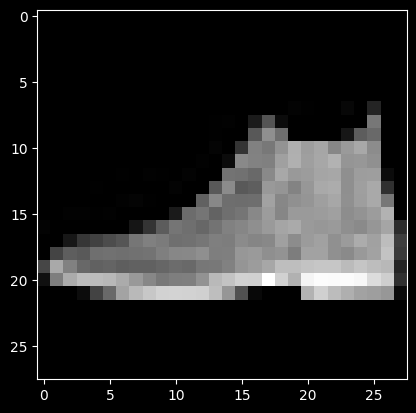

In [11]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

In [12]:
print(model.predict(X_test[0]))

[[1.48699362e-07 1.02758025e-06 1.29768482e-07 5.40652282e-08
  6.29409979e-07 2.17031848e-02 6.74540536e-07 1.92183115e-02
  9.21856664e-05 9.58983654e-01]]


In [13]:
print(np.argmax(model.predict(X_test[0])))
print(y_test[0])

9
9


# Visualize layer outputs for selected samples
These animations are for each sample and display the outputs from each layer. These visualizations are then saved

In [15]:
%matplotlib inline
from matplotlib import animation

fig = plt.figure(figsize=(12,12))

viz_obj = nnfs_module.Visualize_Categorical_Layers(viz_limit=10, path="layer_outs_2",\
                                       X=X_test, y=y_test, model=model, num_categories=10,\
                                       image_dimensions=(28,28), fig=fig)

anim = animation.FuncAnimation(viz_obj.fig, viz_obj.animate_categorical, frames=viz_obj.viz_limit)
plt.show(block=True)

<Figure size 1200x1200 with 0 Axes>

# Plot class sample layer outputs/predictions averages

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2625.10it/s]


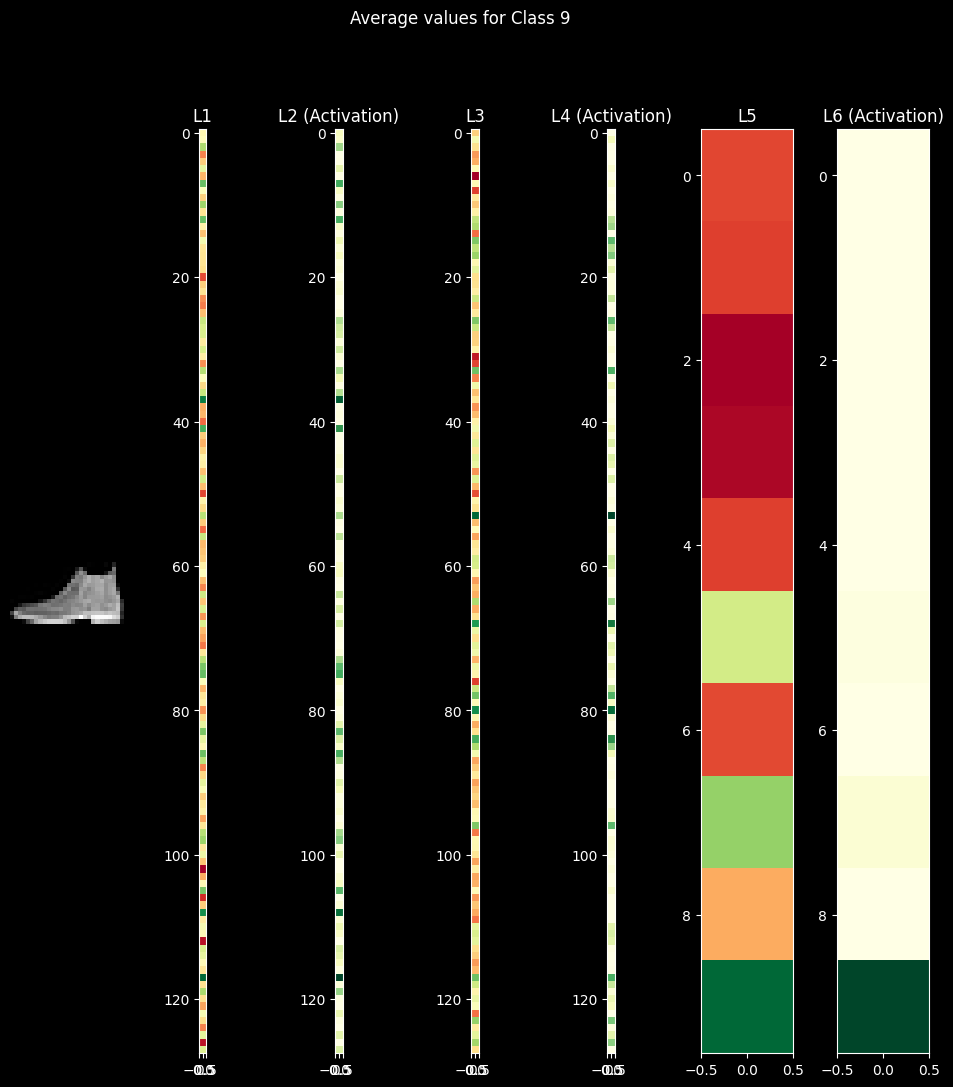

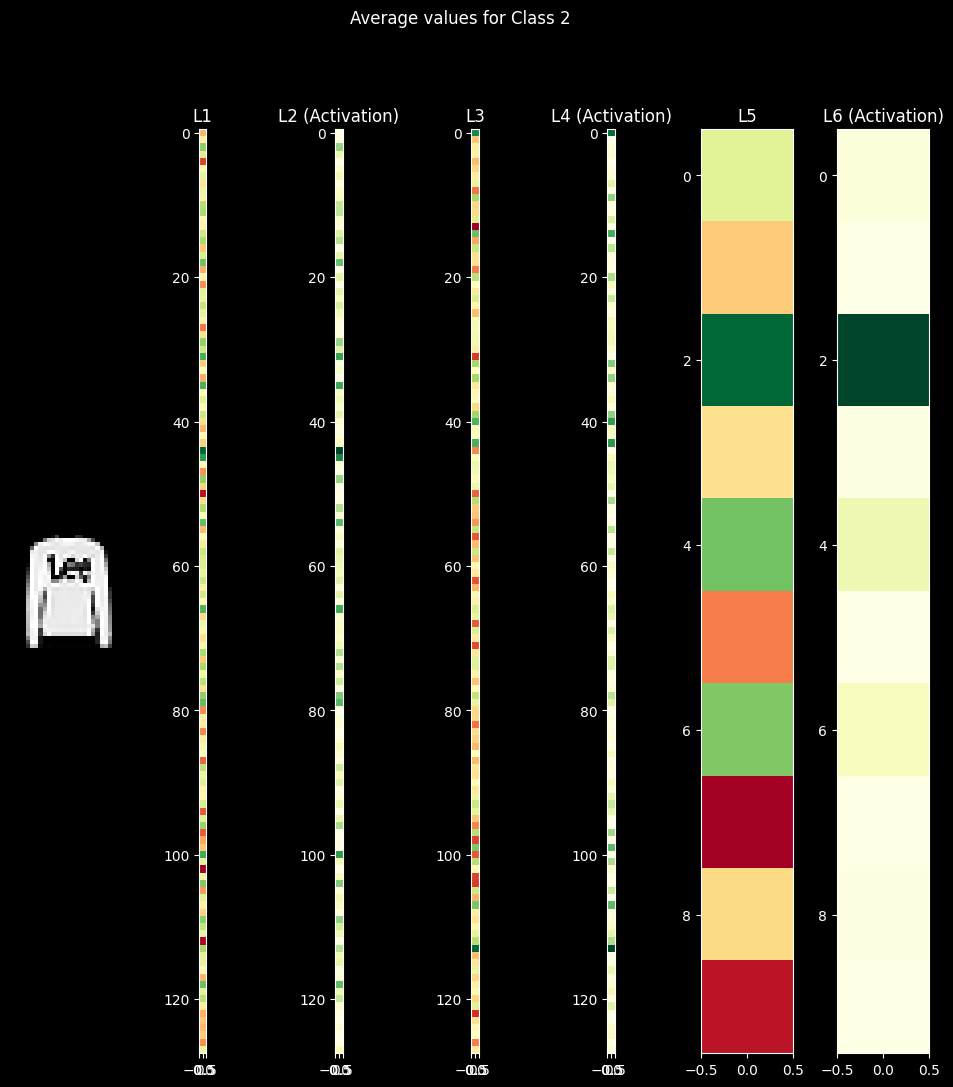

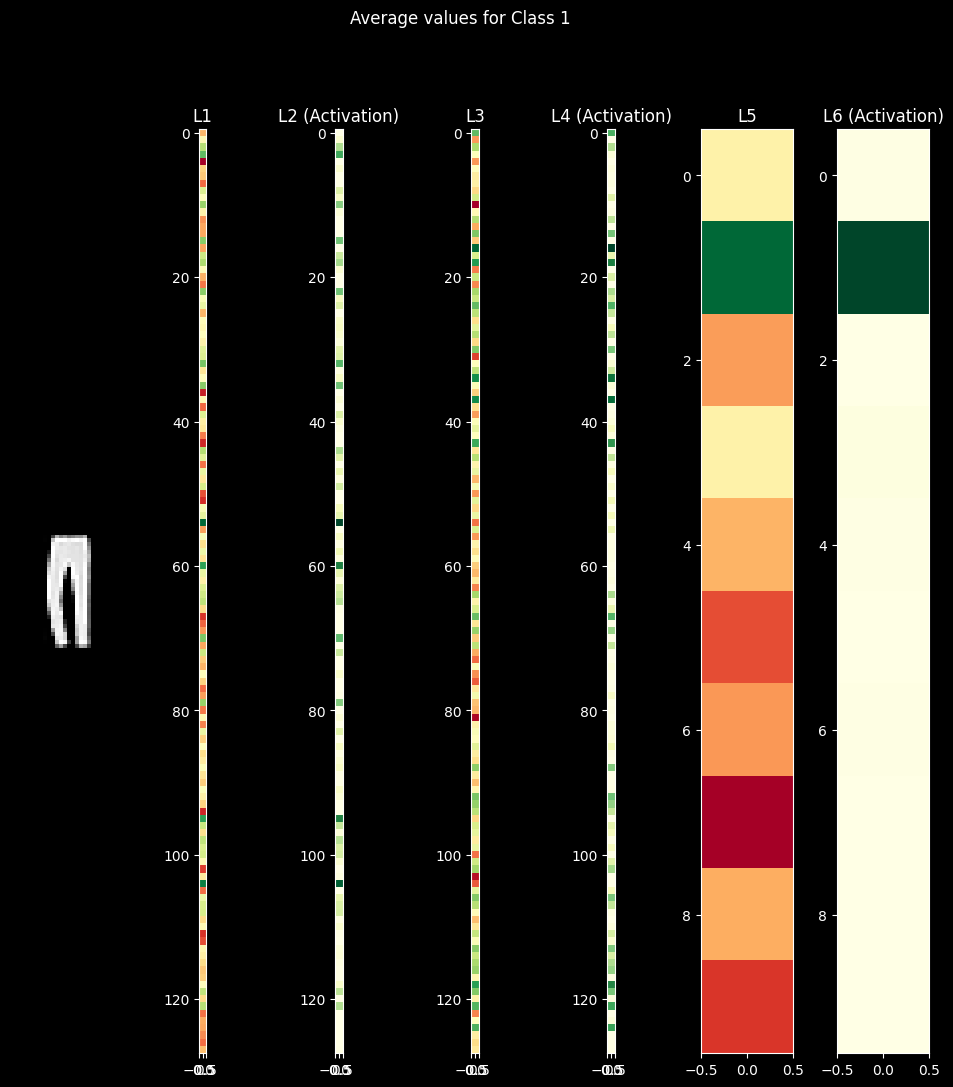

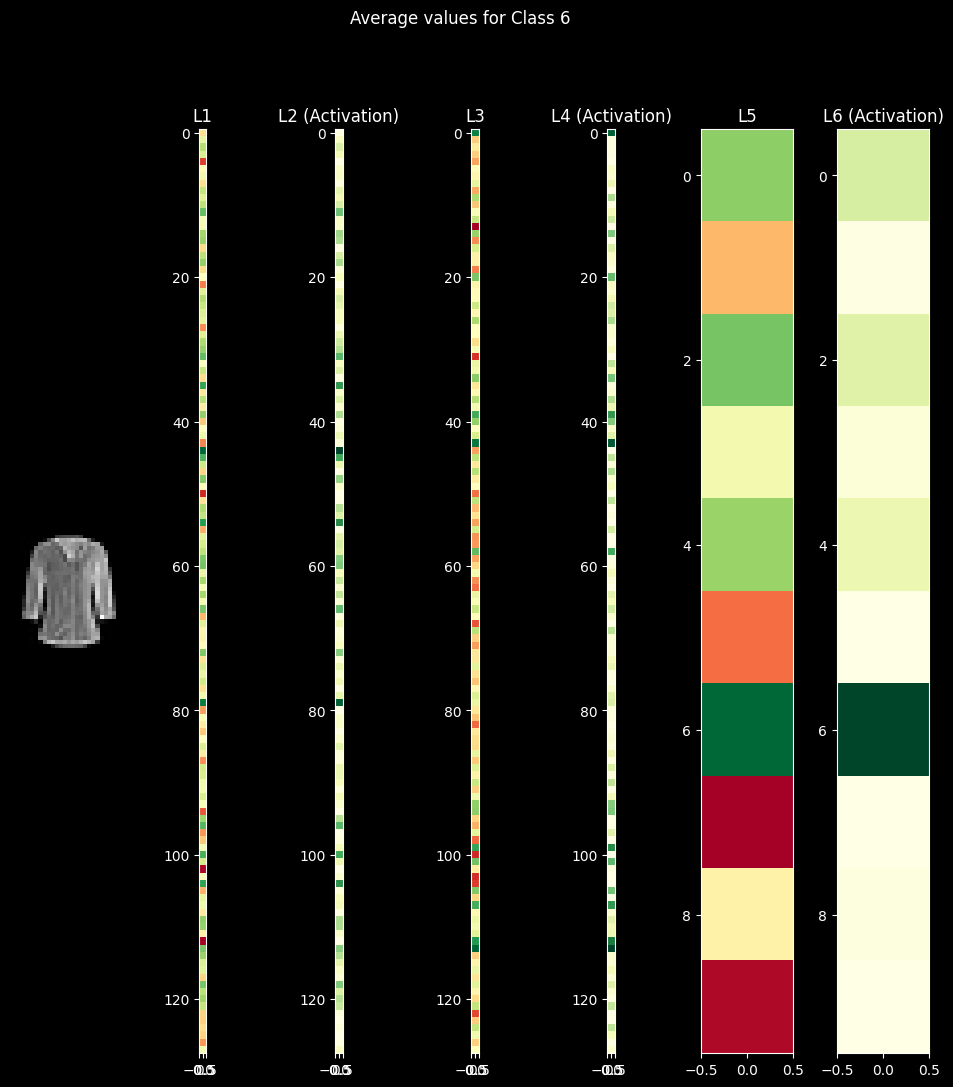

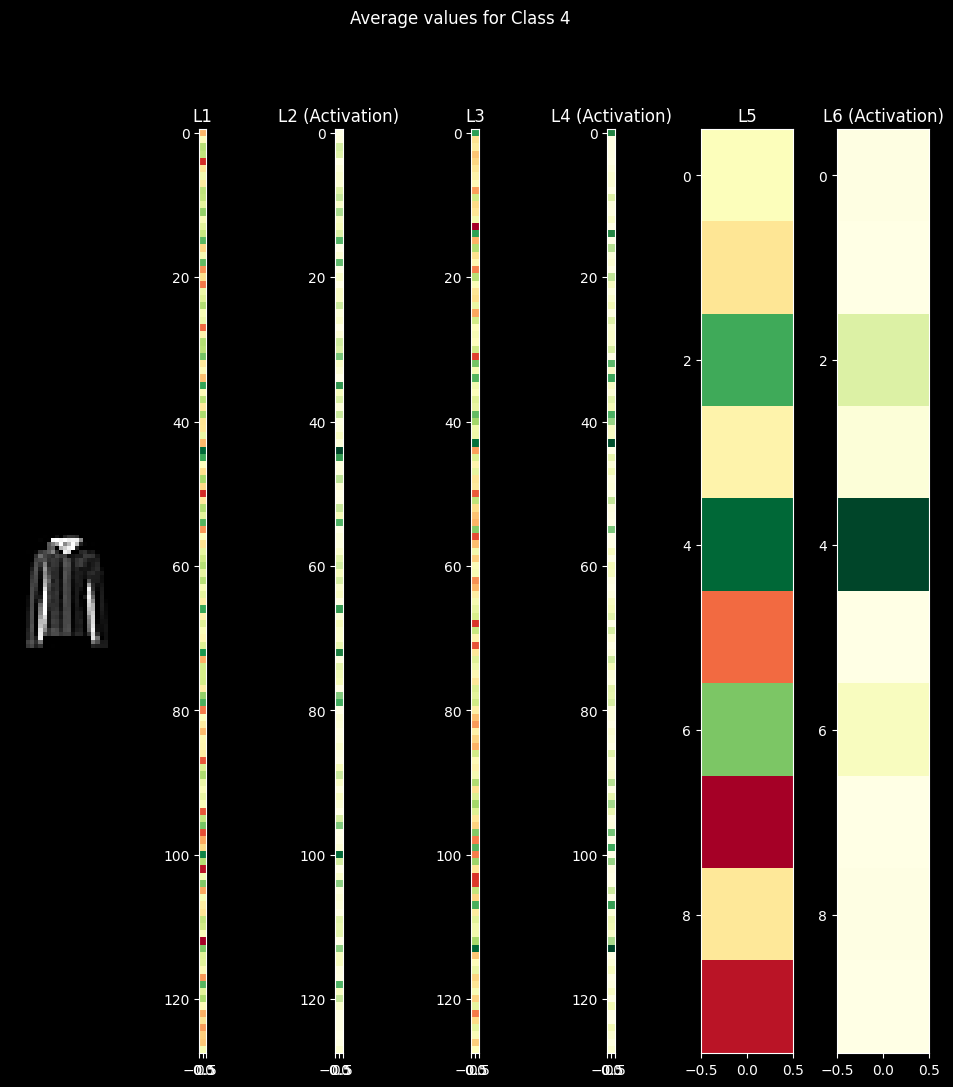

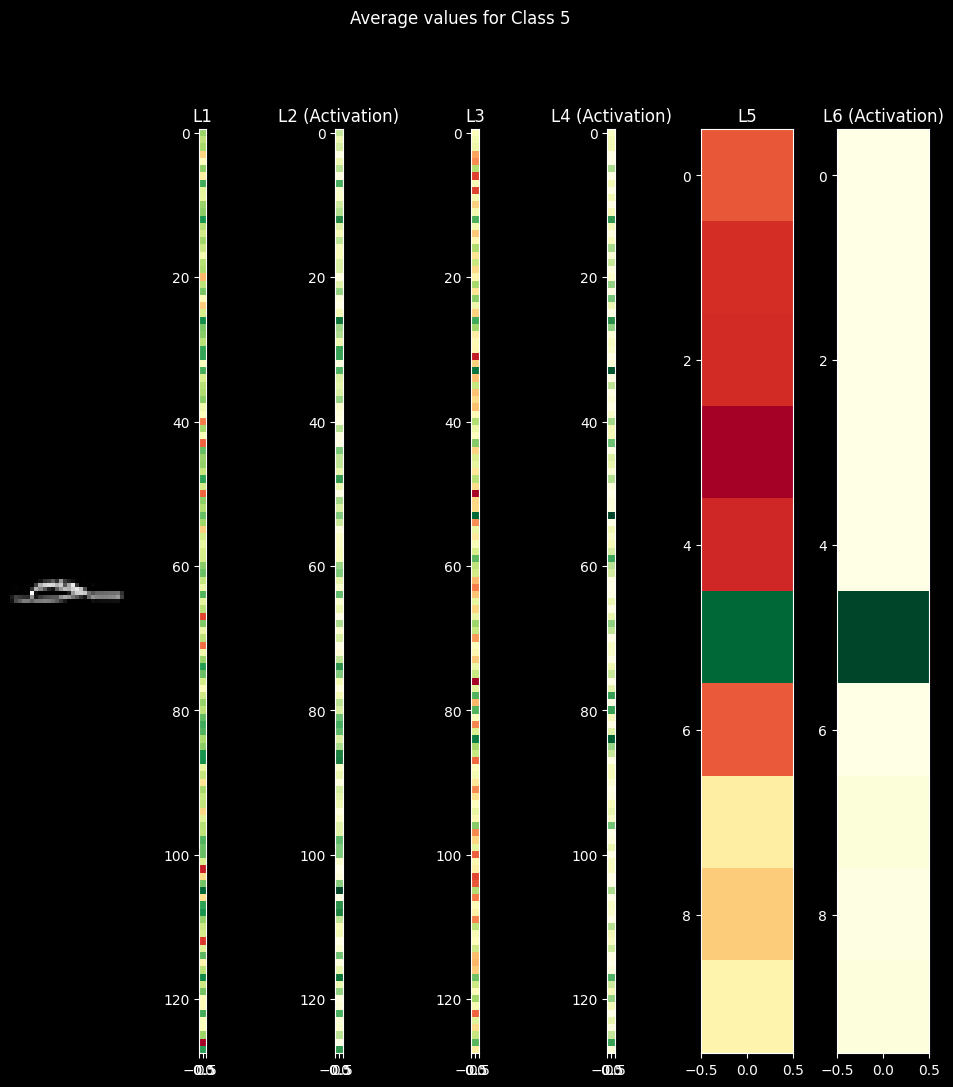

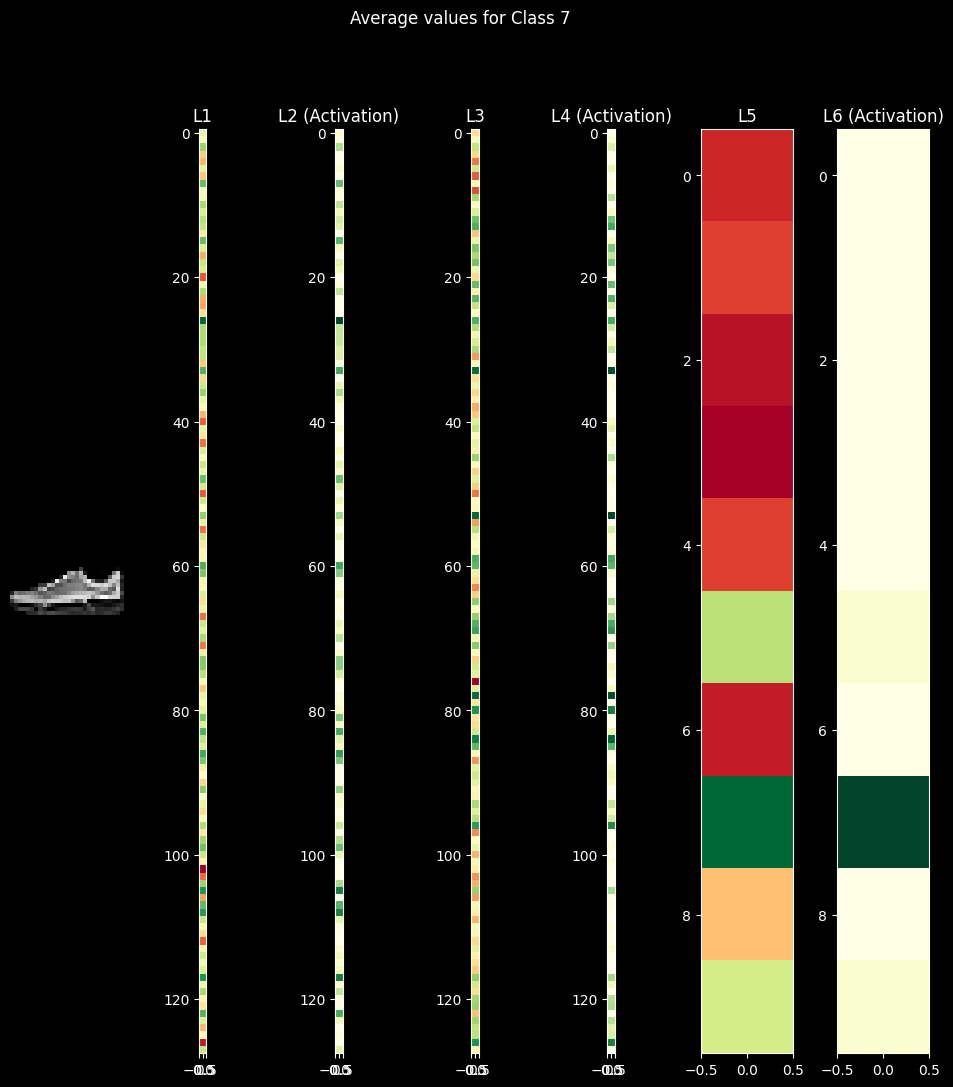

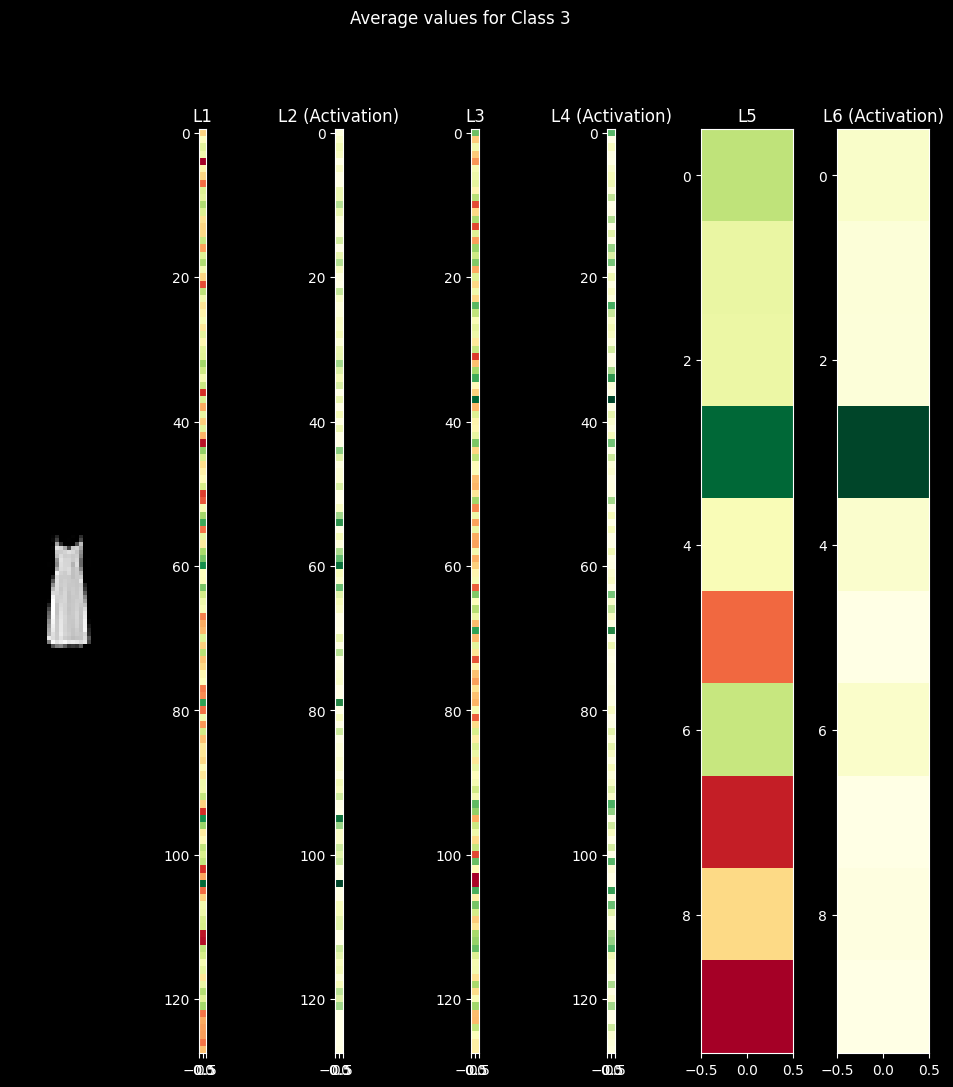

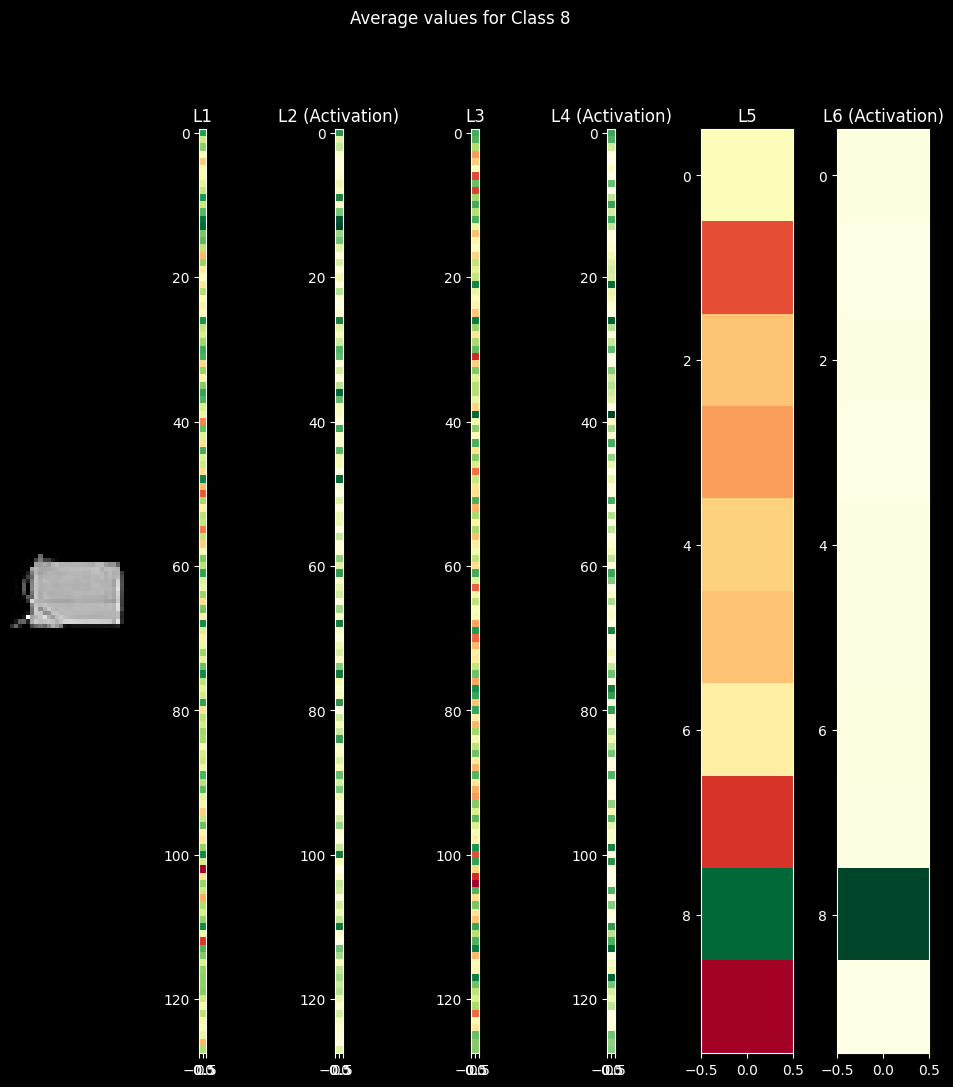

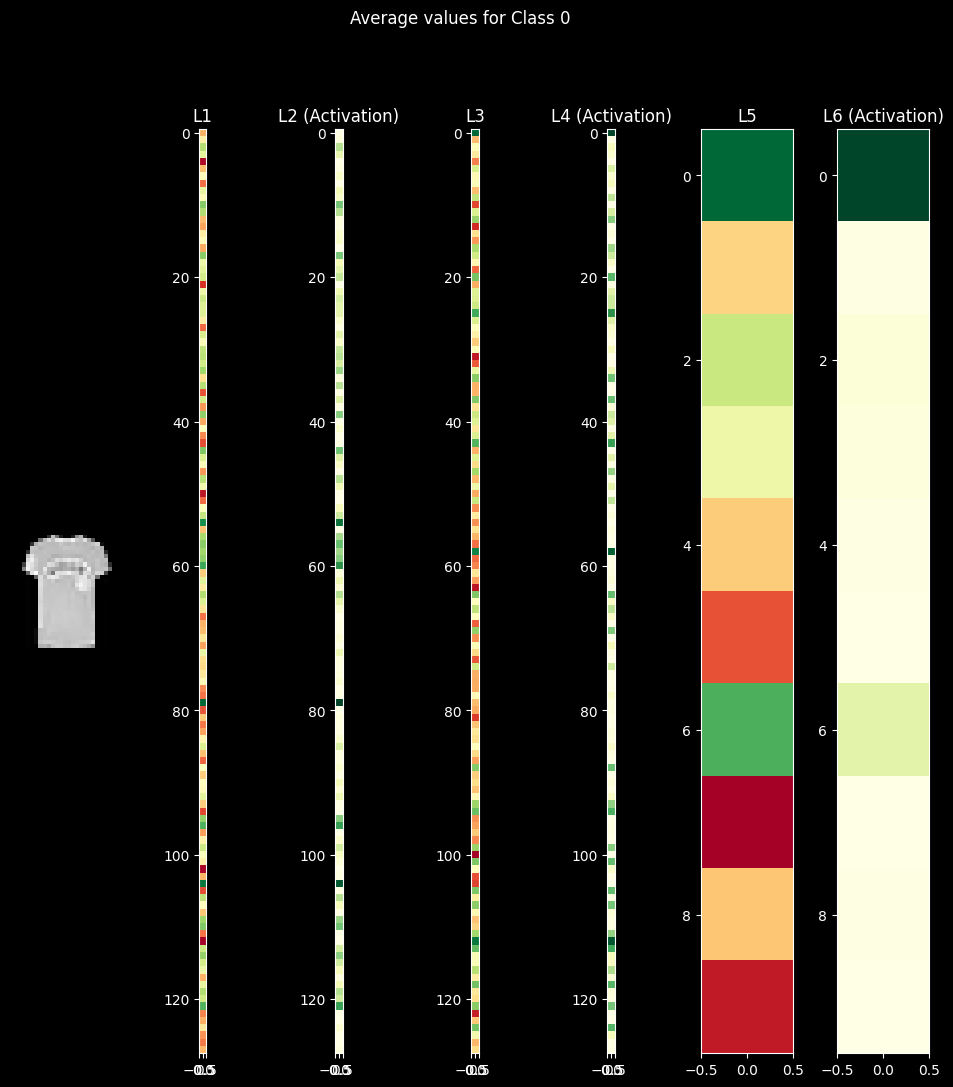

In [16]:
%matplotlib inline
viz_obj = nnfs_module.Visualize_Categorical_Layers(viz_limit=10, path="layer_avgs_2",\
                                       X=X_test, y=y_test, model=model, num_categories=10,\
                                       image_dimensions=(28,28), fig=fig)
viz_obj.visualize_layers_averages_Categorical()

# Plot weight training data for each dense layer

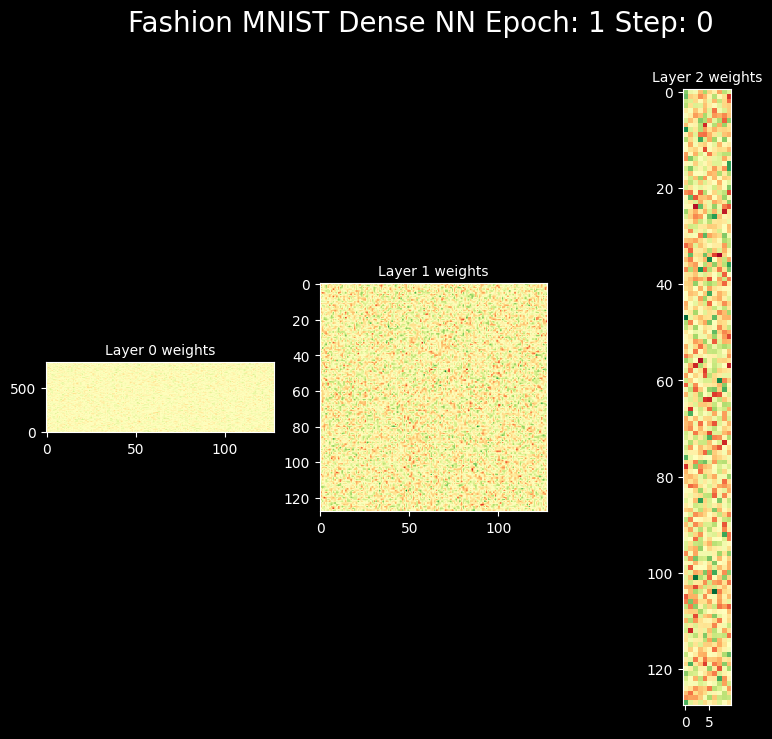

In [17]:
%matplotlib inline
model.plot_training(plot_every=10, key="weights", fig_title="Fashion MNIST")

# Plot Training accuracy, loss, and learning rate metrics

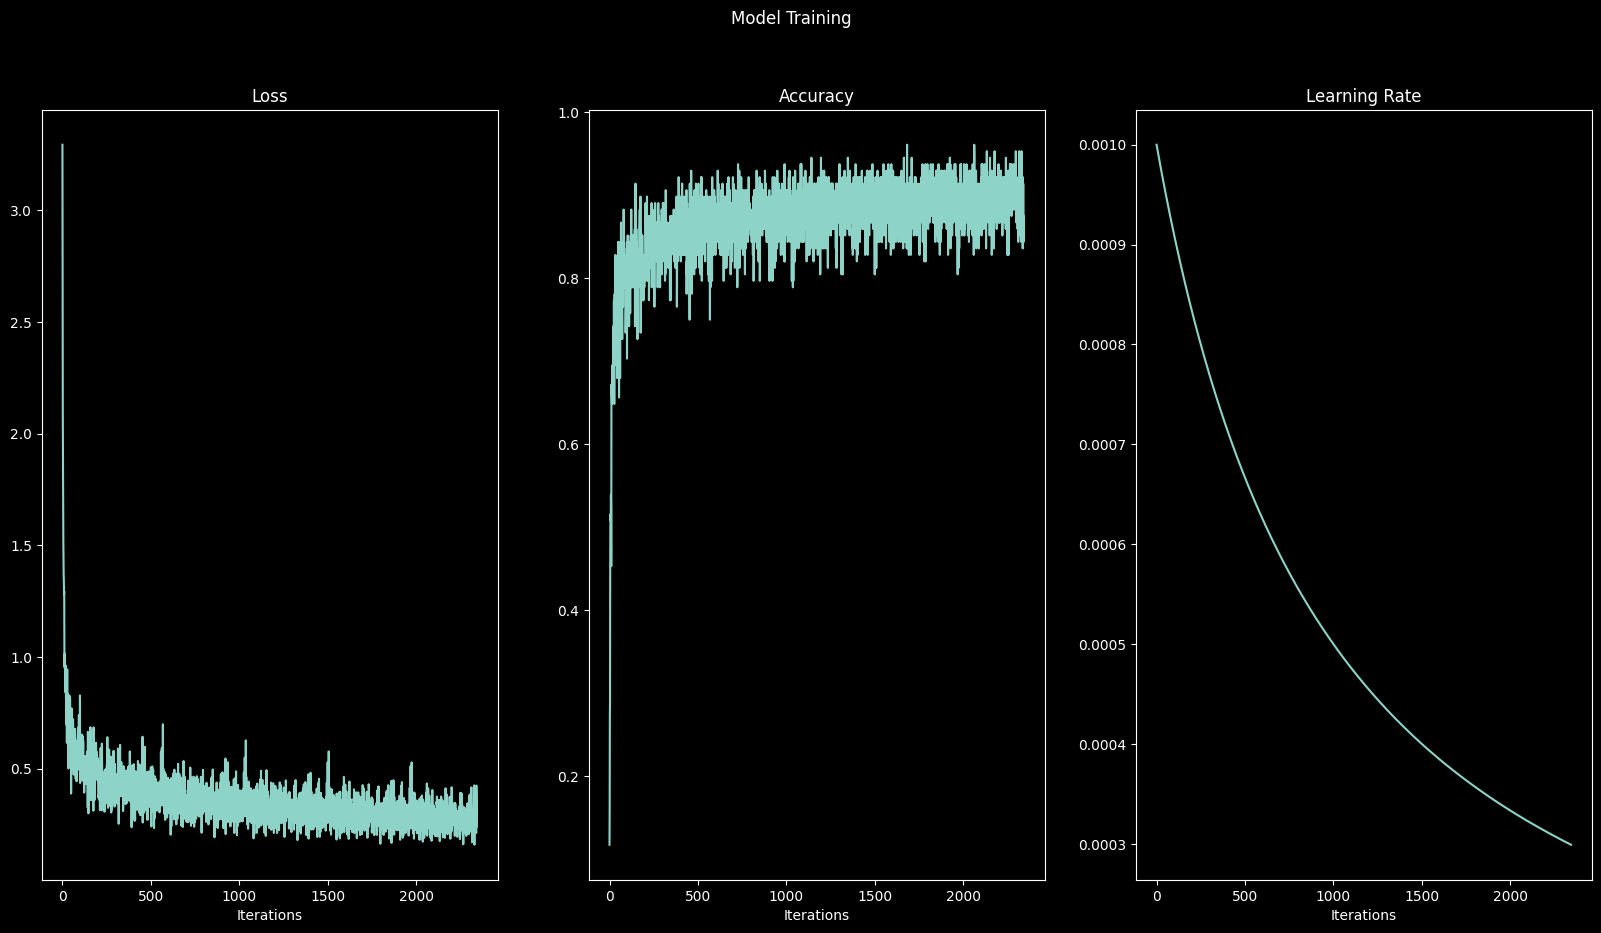

In [18]:
%matplotlib inline
model.plot_metrics()

# Test model using real world data

## Get data
Image was trained on gray scale images

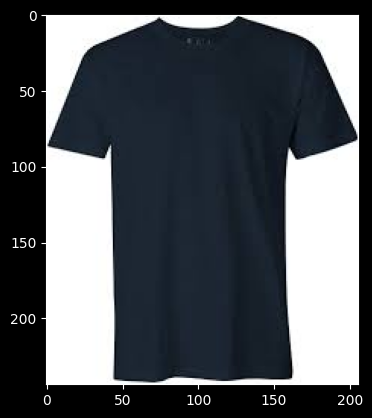

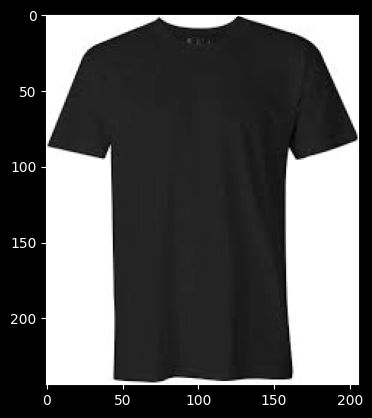

In [19]:
#import image data
image_data = cv2.imread('tshirt.png', cv2.IMREAD_UNCHANGED)

#view image
#convert cv2 from BGR to RGB
#and display using matplotlib
plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
plt.show()

#import same image in gray scale
image_data = cv2.imread('tshirt.png', cv2.IMREAD_GRAYSCALE)

#view image in gray scale
plt.imshow(image_data, cmap='gray')
plt.show()

## Resize data
model was trained on 28x28 pixel images

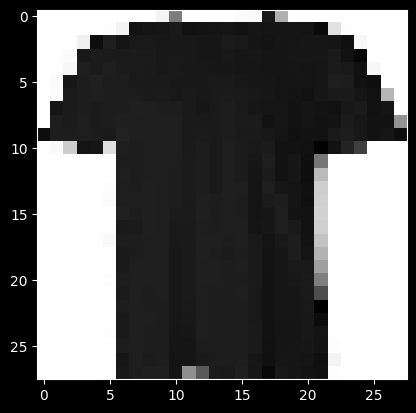

In [20]:
#resize image
image_data = cv2.resize(image_data, (28,28))

#display image
plt.imshow(image_data, cmap='gray')
plt.show()

## Invert image color
Model was trained on inverted images. Invert by subtracting all pixels from max pixel value (255; 0-255)

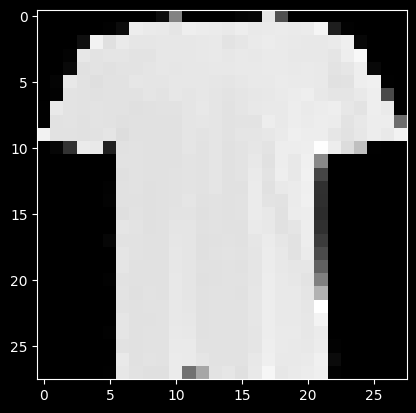

In [21]:
#invert image colors
image_data = 255 - image_data

#print inverted image
plt.imshow(image_data, cmap='gray')
plt.show()

## Reshape and scale pixel data
model was trained on scaled pixel values to be in range of -1 to 1 and flattend images (each sample is a row)

In [22]:
image_data = (image_data.reshape(1, -1).astype(np.float32) - 127.5) / 127.5

## Predict Class

In [38]:
#predict on the image and get confidence levels
confidences = model.predict(image_data)

print("Confidence Per Class (0 -> 1)")
for i, confidence in enumerate(confidences[0]):
    print(f'Class {i}: {confidence}')

#get predictions in label form
predictions = model.output_layer_activation.predictions(confidences)

#get label from label dictionary
prediction = fashion_mnist_labels[predictions[0]]
print(f'Predicted Class: {prediction} (class {predictions[0]})')

Confidence Per Class (0 -> 1)
Class 0: 0.9197140320887924
Class 1: 2.447225191368644e-06
Class 2: 0.00013200263197283551
Class 3: 7.940324965168722e-06
Class 4: 1.7227360512413698e-08
Class 5: 7.762764447763871e-08
Class 6: 0.08012874274620428
Class 7: 2.1627008659903627e-09
Class 8: 1.4734185484186021e-05
Class 9: 3.7796837700647024e-09
Predicted Class: T-shirt / top (class 0)
